## Importing Libraries

In this cell, we import the necessary libraries for data manipulation and random number generation:

- `pandas` is imported as `pd` for handling and analyzing data in tabular form (DataFrames).
- `numpy` is imported as `np` for numerical operations and array handling.
- `random` is imported for generating random numbers and performing random operations.


In [30]:
import pandas as pd
import numpy as np
import random

## Loading Data

In this cell, we load three Excel files into Pandas DataFrames:

- `preferences.xlsx`: Contains the preferences data.
- `guests.xlsx`: Contains the guest information.
- `hotels.xlsx`: Contains the hotel data.

The data is loaded using the `pd.read_excel()` function and stored in the following variables.


In [31]:
preferences = pd.read_excel("preferences.xlsx")
guests = pd.read_excel("guests.xlsx")
hotels = pd.read_excel("hotels.xlsx")

## Exploring the DataFrames

In [32]:
preferences

,Unnamed: 0,guest,hotel,priority
0,0,guest_1,hotel_168,1
1,1,guest_1,hotel_207,2
2,2,guest_1,hotel_222,3
3,3,guest_1,hotel_124,4
4,4,guest_1,hotel_223,5
...,...,...,...,...
99528,99528,guest_4000,hotel_123,28
99529,99529,guest_4000,hotel_396,29
99530,99530,guest_4000,hotel_161,30
99531,99531,guest_4000,hotel_330,31


In [33]:
guests

,Unnamed: 0,guest,discount
0,0,guest_1,0.09
1,1,guest_2,0.00
2,2,guest_3,0.07
3,3,guest_4,0.00
4,4,guest_5,0.10
...,...,...,...
3995,3995,guest_3996,0.00
3996,3996,guest_3997,0.15
3997,3997,guest_3998,0.07
3998,3998,guest_3999,0.08


In [34]:
hotels

,Unnamed: 0,hotel,rooms,price
0,0,hotel_1,13,273
1,1,hotel_2,18,92
2,2,hotel_3,12,141
3,3,hotel_4,18,157
4,4,hotel_5,7,298
...,...,...,...,...
395,395,hotel_396,5,212
396,396,hotel_397,12,68
397,397,hotel_398,14,102
398,398,hotel_399,16,284


## Function: assign_random

This function, `assign_random`, assigns hotels to guests based on their preferences and hotel room availability randomlly.

### Parameters:
- `df_g`: DataFrame containing guest information.
- `df_h`: DataFrame containing hotel information.

### Process:

1. **Priority List**: The function first creates a dictionary, `priority`, where each guest is mapped to a list of their preferred hotels. This is generated by grouping the `preferences` DataFrame by 'guest' and applying `list` to the 'hotel' column.
2. **Hotel Capacity**: The capacity of each hotel is stored in the `capacity` variable, which is a dictionary where each hotel is mapped to the number of available rooms (stored as a list).
3. **Hotel Assignment**: The function loops through each guest in `df_g`, checking their hotel preferences:
    - A random hotel from the guest's priority list is selected.
    - If the hotel has available rooms (i.e., `capacity[random_room][0] >= 1`), the hotel is assigned to the guest (`hotel_num`), and the room count for that hotel is decremented.
    - If the selected hotel is full, it is removed from the guest's preference list, and a new hotel is randomly chosen.
4. **Output**: The updated `df_g` DataFrame, with the `hotel_num` column showing the assigned hotels, is returned.


In [35]:
def assign_random(df_g ,df_h):
    
    priority = preferences.groupby('guest')['hotel'].apply(list).to_dict()
    capacity = df_h.groupby('hotel')['rooms'].apply(list)
    
    df_g['hotel_num'] = np.nan
    for index , row in df_g.iterrows(): 
        while(len(priority[row['guest']])>0 or row['hotel_num'] == np.nan):
            random_room = random.choice(priority[row['guest']])
            if capacity[random_room][0]>=1:
                df_g.at[index, 'hotel_num'] = random_room
                capacity[random_room][0] -= 1
                break
            else:
                priority[row['guest']].remove(random_room)
    return df_g

## Function: assign_priority

The `assign_priority` function assigns hotels to guests based on their preferences, giving priority to the most preferred hotels while considering room availability.

### Parameters:
- `df_g`: DataFrame containing guest information.
- `df_h`: DataFrame containing hotel information.

### Process:

1. **Priority List**: Similar to the previous function, `priority` is a dictionary that maps each guest to a list of their preferred hotels. This is created by grouping the `preferences` DataFrame by 'guest' and applying `list` to the 'hotel' column.
2. **Hotel Capacity**: The `capacity` variable holds the room availability for each hotel. It is a dictionary where each hotel is mapped to a list representing the number of rooms available.
3. **Hotel Assignment**: The function then iterates through each guest in `df_g`:
    - For each guest, the function goes through their list of preferred hotels (in the order of preference).
    - If a hotel has available rooms (i.e., `capacity[hlt][0] >= 1`), the guest is assigned to that hotel (`hotel_num`), and the room count for that hotel is decremented.
    - The loop breaks once a hotel is successfully assigned.

5. **Output**: The updated `df_g` DataFrame, with the `hotel_num` column indicating the assigned hotels, is returned.



In [36]:
def assign_priority(df_g ,df_h):
    
    priority = preferences.groupby('guest')['hotel'].apply(list).to_dict()
    capacity = df_h.groupby('hotel')['rooms'].apply(list)
    
    df_g['hotel_num'] = np.nan
    df_g.drop(columns=['satisfaction', 'price_after_discount'], inplace=True)

    for index , row in df_g.iterrows():       
        for hlt in priority[row['guest']]:
            if capacity[hlt][0]>=1:
                capacity[hlt][0] -= 1
                df_g.at[index, 'hotel_num'] = hlt
                break        
    return df_g

## Function: assign_availability

The `assign_availability` function assigns hotels to guests based on their preferences and hotel availability, prioritizing hotels with the most available rooms.

### Parameters:
- `df_g`: DataFrame containing guest information.
- `df_h`: DataFrame containing hotel information.

### Process:
1. **Priority List**: The `priority` dictionary maps each guest to a list of their preferred hotels, created by grouping the `preferences` DataFrame by 'guest' and applying `list` to the 'hotel' column.
2. **Hotel Capacity**: The `capacity` dictionary stores the number of available rooms for each hotel.
3. **Hotel Sorting**: The `max_capacity` list contains the hotels sorted by the number of available rooms in descending order, ensuring that hotels with more available rooms are considered first.
4. **Hotel Assignment**: The function iterates over each guest in `df_g`:
    - For each guest, the function checks the sorted list of hotels in `max_capacity`.
    - If the hotel is present in the guest's preference list and has available rooms (`capacity[hlt][0] >= 1`), the guest is assigned to that hotel (`hotel_num`), and the room count for that hotel is decremented.
    - The loop breaks once a hotel is successfully assigned.
5. **Data Clean-up**: The columns `satisfaction` and `price_after_discount` are dropped from the `df_g` DataFrame as they are not needed for hotel assignment.
6. **Output**: The updated `df_g` DataFrame, with the `hotel_num` column indicating the assigned hotels, is returned.


In [37]:
def assign_availability(df_g ,df_h):
    priority = preferences.groupby('guest')['hotel'].apply(list).to_dict()
    capacity = df_h.groupby('hotel')['rooms'].apply(list)
    max_capacity = list(df_h.sort_values(by='rooms', ascending=[False])['hotel'])
    df_g['hotel_num'] = np.nan
    df_g.drop(columns=['satisfaction', 'price_after_discount'], inplace=True)
    for index , row in df_g.iterrows():     
        for hlt in max_capacity:
            if hlt in priority[row['guest']]:
                if capacity[hlt][0]>=1:
                    capacity[hlt][0] -= 1
                    df_g.at[index, 'hotel_num'] = hlt
                    break      
    return df_g

## Function: assign_low_price

The `assign_low_price` function assigns hotels to guests based on their preferences, prioritizing hotels with the lowest price while considering room availability.

### Parameters:
- `df_g`: DataFrame containing guest information.
- `df_h`: DataFrame containing hotel information.

### Process:
1. **Priority List**: The `priority` dictionary maps each guest to a list of their preferred hotels, which is created by grouping the `preferences` DataFrame by 'guest' and applying `list` to the 'hotel' column.
2. **Hotel Capacity**: The `capacity` dictionary stores the available room count for each hotel.
3. **Hotel Sorting by Price**: The `min_price` list contains hotels sorted by their price in ascending order. This ensures that hotels with the lowest price are considered first.
4. **Hotel Assignment**: The function iterates through each guest in `df_g`:
    - For each guest, the function checks the sorted list of hotels in `min_price`.
    - If a hotel is present in the guest's preference list and has available rooms (`capacity[hlt][0] >= 1`), the guest is assigned to that hotel (`hotel_num`), and the room count for that hotel is decremented.
    - The loop breaks once a hotel is successfully assigned.
5. **Data Clean-up**: The columns `satisfaction` and `price_after_discount` are dropped from the `df_g` DataFrame as they are not necessary for hotel assignment.
6. **Output**: The updated `df_g` DataFrame, with the `hotel_num` column showing the assigned hotels, is returned.

In [38]:
def assign_low_price(df_g ,df_h):    
    priority = preferences.groupby('guest')['hotel'].apply(list).to_dict()
    capacity = df_h.groupby('hotel')['rooms'].apply(list)
    min_price = list(df_h.sort_values(by='price', ascending=[True])['hotel'])
    df_g['hotel_num'] = np.nan
    df_g.drop(columns=['satisfaction', 'price_after_discount'], inplace=True)
    for index , row in df_g.iterrows():     
        for hlt in min_price:
            if hlt in priority[row['guest']]:
                if capacity[hlt][0]>=1:
                    capacity[hlt][0] -= 1
                    df_g.at[index, 'hotel_num'] = hlt
                    break          
    return df_g

## Function: create_report

The `create_report` function generates a report based on guest hotel assignments, satisfaction, and hotel performance metrics.

### Parameters:
- `df_g`: DataFrame containing guest information and hotel assignments.
- `df_h`: DataFrame containing hotel information, including room availability and price.

### Process:
1. **Priority List**: The `priority` dictionary maps each guest to a list of their preferred hotels, created by grouping the `preferences` DataFrame by 'guest' and applying `list` to the 'hotel' column.
2. **Hotel Capacity**: The `capacity` dictionary stores the available room count for each hotel.
3. **New Columns**: Two new columns are added to `df_g`:
    - `price_after_discount`: Stores the price of the hotel after applying any guest discount.
    - `satisfaction`: Stores the satisfaction score for each guest based on how close their assigned hotel is to their preference.
4. **Satisfaction and Price Calculation**:
    - If a guest is assigned a hotel, the satisfaction score is calculated based on the guest's ranking of the assigned hotel in their preferences.
    - The price after discount is computed by subtracting the discount from the hotel's price.
    - If no hotel is assigned, the satisfaction score is set to 0.00.
5. **Hotel Occupancy**: The `hotel_counts` variable counts how many guests are assigned to each hotel, sorted by hotel number. The count is added to `df_h` in a new column, `guest_count`.
6. **Hotel Revenue**: The total income for each hotel is calculated by summing the `price_after_discount` values for all guests assigned to each hotel. This value is stored in the `hotel_income` column in `df_h`.
7. **Report Metrics**:
    - `number_of_guest_settled_in`: The total number of guests who have been successfully assigned to hotels.
    - `percentage_of_hotels_are_fully_booked`: The percentage of hotels that are fully booked.
    - `satisfaction`: The average satisfaction score of all guests.
    - `hotel_income`: The total revenue generated by all hotels.
8. **Output**: The function prints the following report:
    - How many guests have settled in?
    - What percentage of hotels are fully booked?
    - How satisfied are guests with their hotel?
    - What is the total revenue of the hotels?

The function returns the updated `df_g`, `df_h`, and a list of the report metrics.

In [39]:
def create_report(df_g, df_h):
    
    # Ensure `preferences` is defined or passed to the function if used
    priority = preferences.groupby('guest')['hotel'].apply(list).to_dict()
    capacity = df_h.groupby('hotel')['rooms'].apply(list)
    
    # Initialize new columns
    df_g['price_after_discount'] = np.nan
    df_g['satisfaction'] = np.nan
    
    for index, row in df_g.iterrows():
        if not isinstance(df_g.loc[index, 'hotel_num'], str):
            df_g.at[index, 'satisfaction'] = 0.00
        else:
            room_number = int(df_g.loc[index, 'hotel_num'][6:]) - 1
            df_g.at[index, 'price_after_discount'] = (
                df_h.loc[room_number, 'price'] - df_g.loc[index, 'discount']
            )
            df_g.at[index, 'satisfaction'] = round(
                100 - ((priority[row['guest']].index(df_g.loc[index, 'hotel_num'])) / 
                       len(priority[row['guest']]) * 100), 2
            )

    # Count guests for each hotel

    hotel_counts = df_g['hotel_num'].value_counts()
    hotel_counts = hotel_counts.reindex(sorted(hotel_counts.index, key=lambda x: int(x.split('_')[1])), fill_value=0)
    hotel_counts = guests['hotel_num'].value_counts()
    hotel_counts = hotel_counts.reindex(sorted(hotel_counts.index, key=lambda x: int(x.split('_')[1])), fill_value=0)
    hotel_counts = hotel_counts.reindex([f"hotel_{i}" for i in range(1, 401)], fill_value=0)
    df_h['guest_count'] = hotel_counts.tolist()
    
    # Calculate total income for each hotel

    hotels_income = df_g.groupby('hotel_num')['price_after_discount'].sum()
    hotels_income = hotels_income.reindex(sorted(hotels_income.index, key=lambda x: int(x.split('_')[1])),fill_value=0)
    hotels_income = hotels_income.reindex([f"hotel_{i}" for i in range(1, 401)], fill_value=0)
    df_h['hotel_income'] = hotels_income.tolist()

    
    # Print reports
    number_of_guest_settled_in = df_g['hotel_num'].notnull().sum()
    percentage_of_hotels_are_fully_booked = sum(df_h['rooms'] == df_h['guest_count']) / len(df_h) * 100
    satisfication = df_g['satisfaction'].mean()
    hotel_income = df_h['hotel_income'].sum()
    
    result_list = [number_of_guest_settled_in, percentage_of_hotels_are_fully_booked, satisfication,hotel_income ]
    print("How many guests have settled in?", number_of_guest_settled_in)
    print("What percentage of hotels are fully booked?", percentage_of_hotels_are_fully_booked)
    print("How satisfied are guests with their hotel?", satisfication)
    print("What is the total revenue of the hotels?",  hotel_income)
    
    return df_g, df_h, result_list


# # # # # # # # Running the assign_random Function # ## ## ## ## ## ## ## #

In [49]:
assign_random(guests, hotels)

,Unnamed: 0,guest,discount,hotel_num
0,0,guest_1,0.09,hotel_223
1,1,guest_2,0.00,hotel_138
2,2,guest_3,0.07,hotel_293
3,3,guest_4,0.00,hotel_296
4,4,guest_5,0.10,hotel_159
...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_276
3996,3996,guest_3997,0.15,hotel_217
3997,3997,guest_3998,0.07,hotel_287
3998,3998,guest_3999,0.08,hotel_192


# Result of assign_random Function

In [50]:
df_guests_assign_random, df_hotels_assign_random , random_result = create_report(guests, hotels)
df_guests_assign_random

How many guests have settled in? 3980
What percentage of hotels are fully booked? 62.5
How satisfied are guests with their hotel? 54.684372499999995
What is the total revenue of the hotels? 703520.36


,Unnamed: 0,guest,discount,hotel_num,price_after_discount,satisfaction
0,0,guest_1,0.09,hotel_223,290.91,77.78
1,1,guest_2,0.00,hotel_138,212.00,97.62
2,2,guest_3,0.07,hotel_293,250.93,88.46
3,3,guest_4,0.00,hotel_296,91.00,82.61
4,4,guest_5,0.10,hotel_159,208.90,25.00
...,...,...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_276,245.00,84.09
3996,3996,guest_3997,0.15,hotel_217,291.85,67.86
3997,3997,guest_3998,0.07,hotel_287,159.93,54.05
3998,3998,guest_3999,0.08,hotel_192,94.92,50.00


In [51]:
df_hotels_assign_random

,Unnamed: 0,hotel,rooms,price,guest_count,hotel_income
0,0,hotel_1,13,273,13,3547.91
1,1,hotel_2,18,92,9,827.52
2,2,hotel_3,12,141,11,1550.14
3,3,hotel_4,18,157,11,1726.11
4,4,hotel_5,7,298,7,2085.47
...,...,...,...,...,...,...
395,395,hotel_396,5,212,5,1059.44
396,396,hotel_397,12,68,9,611.40
397,397,hotel_398,14,102,13,1324.93
398,398,hotel_399,16,284,12,3406.96


# # # # # # #  # # # Running the assign_priority Function # ## ## ## ## ## ## #

In [52]:
assign_priority(guests, hotels)

,Unnamed: 0,guest,discount,hotel_num
0,0,guest_1,0.09,hotel_168
1,1,guest_2,0.00,hotel_369
2,2,guest_3,0.07,hotel_157
3,3,guest_4,0.00,hotel_235
4,4,guest_5,0.10,hotel_121
...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_350
3996,3996,guest_3997,0.15,hotel_19
3997,3997,guest_3998,0.07,hotel_117
3998,3998,guest_3999,0.08,hotel_277


# Result of assign_priority Function

In [53]:
df_guests_assign_priority, df_hotels_assign_priority , priority_result = create_report(guests, hotels)
df_guests_assign_priority

How many guests have settled in? 3975
What percentage of hotels are fully booked? 63.74999999999999
How satisfied are guests with their hotel? 97.53097749999999
What is the total revenue of the hotels? 709786.77


,Unnamed: 0,guest,discount,hotel_num,price_after_discount,satisfaction
0,0,guest_1,0.09,hotel_168,297.91,100.00
1,1,guest_2,0.00,hotel_369,133.00,100.00
2,2,guest_3,0.07,hotel_157,64.93,100.00
3,3,guest_4,0.00,hotel_235,136.00,100.00
4,4,guest_5,0.10,hotel_121,55.90,100.00
...,...,...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_350,56.00,100.00
3996,3996,guest_3997,0.15,hotel_19,112.85,100.00
3997,3997,guest_3998,0.07,hotel_117,281.93,97.30
3998,3998,guest_3999,0.08,hotel_277,280.92,100.00


In [54]:
df_hotels_assign_priority

,Unnamed: 0,hotel,rooms,price,guest_count,hotel_income
0,0,hotel_1,13,273,13,3547.46
1,1,hotel_2,18,92,15,1378.13
2,2,hotel_3,12,141,6,845.79
3,3,hotel_4,18,157,17,2667.58
4,4,hotel_5,7,298,7,2085.39
...,...,...,...,...,...,...
395,395,hotel_396,5,212,5,1059.48
396,396,hotel_397,12,68,11,747.15
397,397,hotel_398,14,102,10,1019.26
398,398,hotel_399,16,284,6,1703.40


# # # # # # # # Running the assign_low_price Function # ## ## ## ## ## ## #

In [55]:
assign_low_price(guests, hotels)

,Unnamed: 0,guest,discount,hotel_num
0,0,guest_1,0.09,hotel_22
1,1,guest_2,0.00,hotel_26
2,2,guest_3,0.07,hotel_6
3,3,guest_4,0.00,hotel_321
4,4,guest_5,0.10,hotel_121
...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_115
3996,3996,guest_3997,0.15,hotel_147
3997,3997,guest_3998,0.07,hotel_352
3998,3998,guest_3999,0.08,hotel_277


# Result of assign_low_price Function

In [56]:
df_guests_assign_low_price, df_hotels_assign_low_price , low_price_result = create_report(guests, hotels)
df_guests_assign_low_price

How many guests have settled in? 3925
What percentage of hotels are fully booked? 79.75
How satisfied are guests with their hotel? 54.2340125
What is the total revenue of the hotels? 622273.1000000001


,Unnamed: 0,guest,discount,hotel_num,price_after_discount,satisfaction
0,0,guest_1,0.09,hotel_22,60.91,11.11
1,1,guest_2,0.00,hotel_26,55.00,47.62
2,2,guest_3,0.07,hotel_6,57.93,80.77
3,3,guest_4,0.00,hotel_321,54.00,4.35
4,4,guest_5,0.10,hotel_121,55.90,100.00
...,...,...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_115,244.00,40.91
3996,3996,guest_3997,0.15,hotel_147,250.85,64.29
3997,3997,guest_3998,0.07,hotel_352,275.93,81.08
3998,3998,guest_3999,0.08,hotel_277,280.92,100.00


In [57]:
df_hotels_assign_low_price

,Unnamed: 0,hotel,rooms,price,guest_count,hotel_income
0,0,hotel_1,13,273,2,545.79
1,1,hotel_2,18,92,18,1654.29
2,2,hotel_3,12,141,12,1691.17
3,3,hotel_4,18,157,18,2824.51
4,4,hotel_5,7,298,0,0.00
...,...,...,...,...,...,...
395,395,hotel_396,5,212,5,1059.50
396,396,hotel_397,12,68,12,814.41
397,397,hotel_398,14,102,14,1426.96
398,398,hotel_399,16,284,2,567.71


# # # # # # # # Running the assign_availability Function # ## ## ## ## ## ## 

In [58]:
assign_availability(guests, hotels)

,Unnamed: 0,guest,discount,hotel_num
0,0,guest_1,0.09,hotel_129
1,1,guest_2,0.00,hotel_114
2,2,guest_3,0.07,hotel_122
3,3,guest_4,0.00,hotel_29
4,4,guest_5,0.10,hotel_305
...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_215
3996,3996,guest_3997,0.15,hotel_214
3997,3997,guest_3998,0.07,hotel_352
3998,3998,guest_3999,0.08,hotel_311


# Result of assign_availability Function

In [59]:
df_guests_assign_availability, df_hotels_assign_availability , availability_result = create_report(guests, hotels)
df_guests_assign_availability

How many guests have settled in? 3954
What percentage of hotels are fully booked? 66.5
How satisfied are guests with their hotel? 53.77732
What is the total revenue of the hotels? 695724.07


,Unnamed: 0,guest,discount,hotel_num,price_after_discount,satisfaction
0,0,guest_1,0.09,hotel_129,84.91,66.67
1,1,guest_2,0.00,hotel_114,178.00,45.24
2,2,guest_3,0.07,hotel_122,166.93,34.62
3,3,guest_4,0.00,hotel_29,145.00,69.57
4,4,guest_5,0.10,hotel_305,73.90,83.33
...,...,...,...,...,...,...
3995,3995,guest_3996,0.00,hotel_215,133.00,36.36
3996,3996,guest_3997,0.15,hotel_214,78.85,71.43
3997,3997,guest_3998,0.07,hotel_352,275.93,81.08
3998,3998,guest_3999,0.08,hotel_311,252.92,83.33


In [60]:
df_hotels_assign_availability

,Unnamed: 0,hotel,rooms,price,guest_count,hotel_income
0,0,hotel_1,13,273,13,3547.64
1,1,hotel_2,18,92,18,1654.15
2,2,hotel_3,12,141,12,1690.99
3,3,hotel_4,18,157,18,2824.70
4,4,hotel_5,7,298,0,0.00
...,...,...,...,...,...,...
395,395,hotel_396,5,212,4,847.65
396,396,hotel_397,12,68,12,815.27
397,397,hotel_398,14,102,14,1426.65
398,398,hotel_399,16,284,16,4542.35


# sammary of reports and using of matplotlip

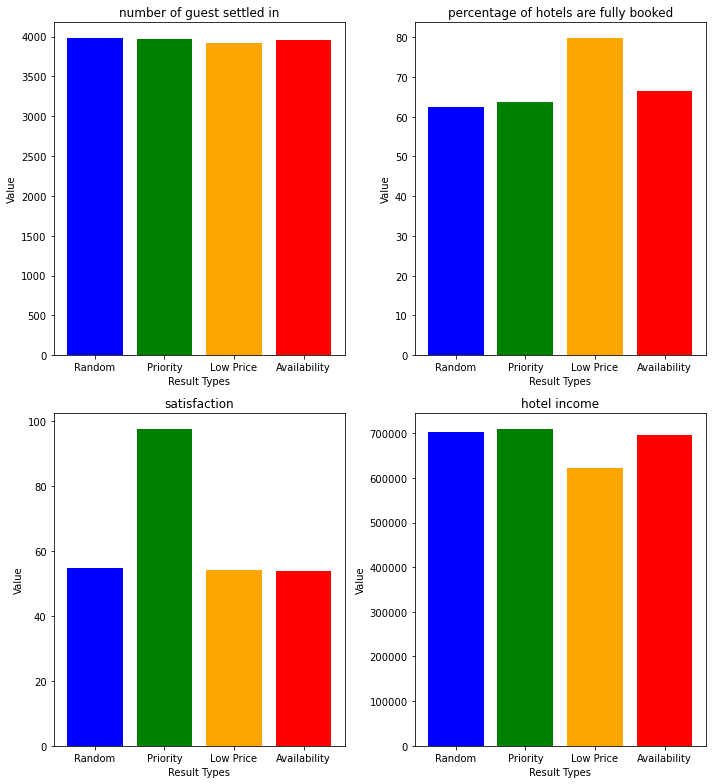

In [70]:
import matplotlib.pyplot as plt

data = [random_result, priority_result, low_price_result, availability_result]
labels = ['Random', 'Priority', 'Low Price', 'Availability']
titles = ['number of guest settled in', 'percentage of hotels are fully booked', 'satisfaction', 'hotel income']

fig, axs = plt.subplots(2, 2, figsize=(10,11))
axs = axs.flatten()
for i in range(4):
    values = [lst[i] for lst in data]
    
    # Create the bar chart
    axs[i].bar(labels, values, color=['blue', 'green', 'orange', 'red'])
    
    # Add titles and labels
    axs[i].set_title(titles[i])
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Result Types')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
